# CO2 EMISSION

## Feature Engeneering

## 1. Import Necessary Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import ExtraTreesRegressor

## 2. Load Data

In [2]:
emission_data=pd.read_csv('Emission_dataset.csv')
emission_data.head(11)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,acura,ilx,compact,2.0,4,as,z,9.9,6.7,8.5,33.0,196.0
1,acura,ilx,compact,2.4,4,m,z,11.2,7.7,9.6,29.0,221.0
2,acura,ilx hybrid,compact,1.5,4,av,z,6.0,5.8,5.9,47.0,136.0
3,acura,mdx 4wd,suv - small,3.5,6,as,z,12.7,9.1,11.1,25.0,255.0
4,acura,rdx awd,suv - small,3.5,6,as,z,12.1,8.7,10.6,27.0,244.0
5,acura,rlx,mid-size,3.5,6,as,z,11.9,7.7,10.0,28.0,230.0
6,acura,tl,mid-size,3.5,6,as,z,11.8,8.1,10.1,28.0,232.0
7,acura,tl awd,mid-size,3.7,6,as,z,12.8,9.0,11.1,25.0,255.0
8,acura,tl awd,mid-size,3.7,6,m,z,13.4,9.5,11.6,24.0,267.0
9,acura,tsx,compact,2.4,4,as,z,10.6,7.5,9.2,31.0,212.0


In [3]:
emission_data_copy=emission_data.copy()

## 3. Data Pre-Processing

In [4]:
# Dropping make and model features
emission_data=emission_data.drop(['make','model'], axis=1)
emission_data.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,compact,2.0,4,as,z,9.9,6.7,8.5,33.0,196.0
1,compact,2.4,4,m,z,11.2,7.7,9.6,29.0,221.0
2,compact,1.5,4,av,z,6.0,5.8,5.9,47.0,136.0
3,suv - small,3.5,6,as,z,12.7,9.1,11.1,25.0,255.0
4,suv - small,3.5,6,as,z,12.1,8.7,10.6,27.0,244.0


In [5]:
# Converting Categorical variables to ordinal
oc = OrdinalEncoder()
cols = ['vehicle_class','transmission','fuel_type']
emission_data[cols] = oc.fit_transform(emission_data[cols])
emission_data.head(11)

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0.0,2.0,4,2.0,4.0,9.9,6.7,8.5,33.0,196.0
1,0.0,2.4,4,4.0,4.0,11.2,7.7,9.6,29.0,221.0
2,0.0,1.5,4,3.0,4.0,6.0,5.8,5.9,47.0,136.0
3,11.0,3.5,6,2.0,4.0,12.7,9.1,11.1,25.0,255.0
4,11.0,3.5,6,2.0,4.0,12.1,8.7,10.6,27.0,244.0
5,2.0,3.5,6,2.0,4.0,11.9,7.7,10.0,28.0,230.0
6,2.0,3.5,6,2.0,4.0,11.8,8.1,10.1,28.0,232.0
7,2.0,3.7,6,2.0,4.0,12.8,9.0,11.1,25.0,255.0
8,2.0,3.7,6,4.0,4.0,13.4,9.5,11.6,24.0,267.0
9,0.0,2.4,4,2.0,4.0,10.6,7.5,9.2,31.0,212.0


In [6]:
X=emission_data.drop('co2_emissions', axis=1)
y=emission_data[['co2_emissions']]

In [7]:
X.shape, y.shape

((5981, 9), (5981, 1))

## 4. FEATURE SELECTION TECHNIQUES

###  SelectKBest Technique : f_regression 

It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection.

The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that any interaction between input variables is not considered in the filtering process.


In [8]:
select_k_best=SelectKBest(score_func=f_regression,k=6)
select_k_best.fit(X,y)

SelectKBest(k=6, score_func=<function f_regression at 0x000001F941AF2280>)

In [9]:
select_k_best.get_support()

array([False,  True,  True, False, False,  True,  True,  True,  True])

In [10]:
X.columns[select_k_best.get_support()]

Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)'],
      dtype='object')

These are the features which are highly corelated with target feature.

###  Using ExtraTreeRegreser feature_importances

In [11]:
extra_tree_reg=ExtraTreesRegressor()

In [12]:
extra_tree_reg.fit(X,y)

ExtraTreesRegressor()

In [13]:
extra_tree_reg.feature_importances_

array([0.00394546, 0.11309525, 0.06717086, 0.00040742, 0.04944627,
       0.17736214, 0.13464244, 0.2725337 , 0.18139645])

In [14]:
ranked_features=pd.DataFrame({'features':X.columns,'scores':extra_tree_reg.feature_importances_})
ranked_features

,features,scores
0,vehicle_class,0.003945
1,engine_size,0.113095
2,cylinders,0.067171
3,transmission,0.000407
4,fuel_type,0.049446
5,fuel_consumption_city,0.177362
6,fuel_consumption_hwy,0.134642
7,fuel_consumption_comb(l/100km),0.272534
8,fuel_consumption_comb(mpg),0.181396


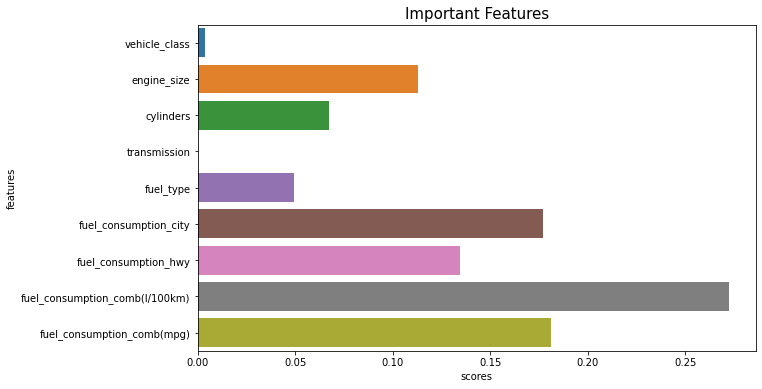

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='scores',y='features', data=ranked_features)
plt.title('Important Features', size=15)
plt.show()

In [16]:
ranked_features.sort_values(by='scores', ascending=False).head(6)

,features,scores
7,fuel_consumption_comb(l/100km),0.272534
8,fuel_consumption_comb(mpg),0.181396
5,fuel_consumption_city,0.177362
6,fuel_consumption_hwy,0.134642
1,engine_size,0.113095
2,cylinders,0.067171


Here we can see the rank of explanatory variables which has high correlation with target variable.

## Removal of Highly Correlated Explanatory Features

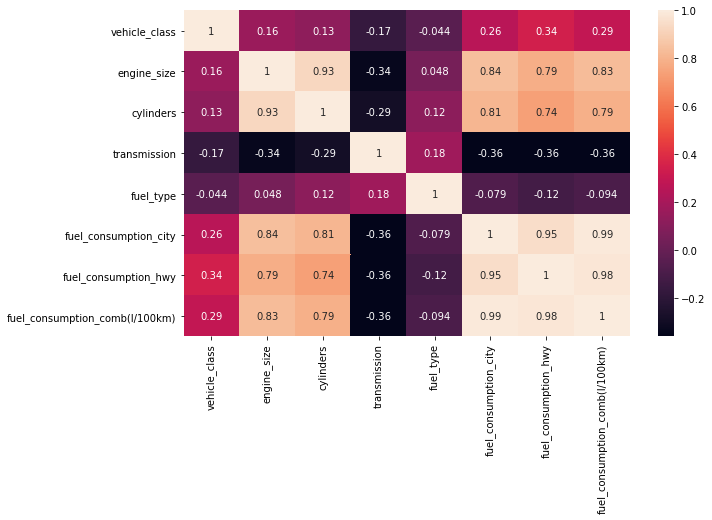

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(X.iloc[:,:-1].corr(), annot=True)
plt.show()

In [18]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
correlation(X.iloc[:,:-1], 0.80)

{'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_hwy'}

These are the variables which are highly correlated with each other

Here we will consider cylenders and fuel_consumption_comb(1/100km) as they are highly correlated with target variables and less correalated with each other.

## 5. Final DataSet

In [20]:
emission_dataset=emission_data_copy.iloc[:,[2,3,4,5,6,9,11]]
emission_dataset.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb(l/100km),co2_emissions
0,compact,2.0,4,as,z,8.5,196.0
1,compact,2.4,4,m,z,9.6,221.0
2,compact,1.5,4,av,z,5.9,136.0
3,suv - small,3.5,6,as,z,11.1,255.0
4,suv - small,3.5,6,as,z,10.6,244.0


In [21]:
emission_dataset['transmission']=emission_dataset['transmission'].map({"a":"Automatic",'am':'Automated manual','as':'Automatic with select shift','av':'Continuously variable','m':'Manual'})
emission_dataset['fuel_type']=emission_dataset['fuel_type'].map({"x":"Regular gasoline",'z':'Premium gasoline','d':'Diesel','e':'Ethanol (E85)','n':'Natural gas'})
emission_dataset.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_consumption_comb'}, inplace=True)
emission_dataset.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,compact,2.0,4,Automatic with select shift,Premium gasoline,8.5,196.0
1,compact,2.4,4,Manual,Premium gasoline,9.6,221.0
2,compact,1.5,4,Continuously variable,Premium gasoline,5.9,136.0
3,suv - small,3.5,6,Automatic with select shift,Premium gasoline,11.1,255.0
4,suv - small,3.5,6,Automatic with select shift,Premium gasoline,10.6,244.0


In [22]:
emission_dataset.to_csv('Final_Emission_Data.csv', index=False)